<a href="https://colab.research.google.com/github/GRUPO3TFM/TFM/blob/main/Modelo_Lineal_para_Impacto_del_Clima_en_Retrasos_Ferroviarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargado de Archivos de Clima, Trenes y Preprocesado

### 1. Cargamos desde nuestro entorno local todos los archivos de lluvias, temperaturas y viento al Colab.

### 2. Limpiamos y Preprocesamos Dataframe Lluvias por hora y ciudad.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import numpy as np

In [ ]:
uploaded_files = glob.glob("/content/precipitacion_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'R1', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'R1': 'lluvia_mm'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    rain_data = pd.concat(dataframes, ignore_index=True)
    display(rain_data.head())
    display(rain_data.describe())
    distinct_cities = rain_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,lluvia_mm,city
0,2024-07-07 00:00:00,0.0,Münster(Westf)
1,2024-07-07 01:00:00,0.0,Münster(Westf)
2,2024-07-07 02:00:00,0.0,Münster(Westf)
3,2024-07-07 03:00:00,0.0,Münster(Westf)
4,2024-07-07 04:00:00,0.0,Münster(Westf)


,datetime,lluvia_mm
count,3888,3888.000000
mean,2024-07-11 11:30:00,0.104552
min,2024-07-07 00:00:00,0.000000
25%,2024-07-09 05:45:00,0.000000
50%,2024-07-11 11:30:00,0.000000
75%,2024-07-13 17:15:00,0.000000
max,2024-07-15 23:00:00,23.100000
std,NaN,0.836077


array(['Münster(Westf)', 'Düsseldorf', 'Berlin', 'Koln', 'Hamburg',
       'Munchen', 'Bonn', 'Bochum', 'Duisburg', 'Leipzig', 'Dresden',
       'Hannover', 'Bremen', 'Frankfurt_am_Main', 'Essen', 'Bielefeld',
       'Nürnberg', 'Wuppertal'], dtype=object)

### 3. Limpiamos y Preprocesamos Dataframe Vientos por hora y ciudad.

In [ ]:
uploaded_files = glob.glob("/content/Extreme_wind_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[2:-1])
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        if not df.empty:
            df = df[['MESS_DATUM', 'FX_911', 'city']]
            df.rename(columns={'MESS_DATUM': 'datetime', 'FX_911': 'windspeed_mps'}, inplace=True)
            dataframes.append(df)
    except Exception as e:
        continue

if dataframes:
    wind_data = pd.concat(dataframes, ignore_index=True)
    display(wind_data.head())
    display(wind_data.describe())
    distinct_cities = wind_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,windspeed_mps,city
0,2024-07-07 00:00:00,4.6,Koln
1,2024-07-07 01:00:00,4.6,Koln
2,2024-07-07 02:00:00,4.6,Koln
3,2024-07-07 03:00:00,5.7,Koln
4,2024-07-07 04:00:00,5.7,Koln


,datetime,windspeed_mps
count,3239,3239.000000
mean,2024-07-11 11:29:20.543377920,5.698271
min,2024-07-07 00:00:00,0.500000
25%,2024-07-09 05:30:00,3.500000
50%,2024-07-11 11:00:00,5.200000
75%,2024-07-13 17:30:00,7.500000
max,2024-07-15 23:00:00,21.900000
std,NaN,2.854591


array(['Koln', 'Nürnberg', 'Munchen', 'Hamburg', 'Frankfurt_am_Main',
       'Stuttgart', 'Düsseldorf', 'Leipzig', 'Berlin', 'Dresden', 'Essen',
       'Wuppertal', 'Bremen', 'Hannover', 'Münster'], dtype=object)

### 4. Limpiamos y Preprocesamos Dataframe para Temperaturas por hora y ciudad.

In [ ]:
uploaded_files = glob.glob("/content/Temperature_*.txt")

dataframes = []

def extract_city(file_name):
    base_name = os.path.basename(file_name)
    parts = base_name.split('_')
    city = "_".join(parts[1:-1])  # Ajuste para extraer correctamente el nombre de la ciudad
    return city

for file_path in uploaded_files:
    try:
        df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)
        city = extract_city(file_path)
        df['city'] = city

        df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H%M', errors='coerce')
        df = df[df['MESS_DATUM'] >= '2024-07-07']

        required_columns = ['TX_10', 'TX5_10', 'TN_10', 'TN5_10']
        if all(col in df.columns for col in required_columns):
            df = df[['MESS_DATUM', 'TX_10', 'TX5_10', 'TN_10', 'TN5_10', 'city']]
            df.rename(columns={
                'MESS_DATUM': 'datetime',
                'TX_10': 'max_temp_2m_C',
                'TX5_10': 'max_temp_5cm_C',
                'TN_10': 'min_temp_2m_C',
                'TN5_10': 'min_temp_5cm_C'
            }, inplace=True)
            df.replace(-999, np.nan, inplace=True)

            df_num = df.drop(columns=['city'])
            df_num.set_index('datetime', inplace=True)
            df_num = df_num.resample('H').mean().reset_index()
            df_num['city'] = city

            dataframes.append(df_num)
        else:
            print(f"El archivo {file_path} no contiene las columnas necesarias y será omitido.")
    except Exception as e:
        print(f"Error al procesar el archivo {file_path}: {e}")

if dataframes:
    temp_data = pd.concat(dataframes, ignore_index=True)
    display(temp_data.head())
    display(temp_data.describe())
    distinct_cities = temp_data['city'].unique()
    display(distinct_cities)
else:
    print("No se encontraron archivos válidos para concatenar.")

,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C,city
0,2024-07-07 00:00:00,10.200000,NaN,9.916667,6.916667,Wuppertal
1,2024-07-07 01:00:00,9.400000,NaN,9.116667,6.350000,Wuppertal
2,2024-07-07 02:00:00,8.583333,NaN,8.316667,5.800000,Wuppertal
3,2024-07-07 03:00:00,8.933333,NaN,8.650000,6.800000,Wuppertal
4,2024-07-07 04:00:00,9.283333,NaN,8.983333,7.483333,Wuppertal


,datetime,max_temp_2m_C,max_temp_5cm_C,min_temp_2m_C,min_temp_5cm_C
count,4099,4099.000000,0.0,4099.000000,4099.000000
mean,2024-07-11 11:22:07.933642496,19.768805,NaN,19.363003,19.794169
min,2024-07-07 00:00:00,8.583333,NaN,8.316667,5.800000
25%,2024-07-09 05:00:00,16.300000,NaN,15.991667,15.500000
50%,2024-07-11 11:00:00,19.483333,NaN,19.116667,19.116667
75%,2024-07-13 17:00:00,22.891667,NaN,22.333333,23.916667
max,2024-07-15 23:00:00,32.783333,NaN,32.300000,36.583333
std,NaN,4.662853,NaN,4.556732,5.911589


array(['Wuppertal', 'Bonn', 'Essen', 'Berlin', 'Düsseldorf', 'Hannover',
       'Koln', 'Bochum', 'Dresden', 'Bielefeld', 'Nürnberg', 'Hamburg',
       'Leipzig', 'Münster(Westf)', 'Duisburg', 'Bremen',
       'Frankfurt_am_Main', 'Munchen', 'Stuttgart'], dtype=object)

### 5. Estandarizamos los nombres de las diversas ciudades en los dataframes para que matcheen a aquellas en BigQuery

In [ ]:
hbf_mapping = {
    'Düsseldorf Hbf': 'Düsseldorf',
    'Dortmund Hbf': 'Dortmund',
    'Hamburg Hbf': 'Hamburg',
    'Köln Hbf': 'Koln',
    'Frankfurt(Main)Hbf': 'Frankfurt_am_Main',
    'Hannover Hbf': 'Hannover',
    'Berlin Hbf': 'Berlin',
    'Bremen Hbf': 'Bremen',
    'Nürnberg Hbf': 'Nürnberg',
    'Bochum Hbf': 'Bochum',
    'Wuppertal Hbf': 'Wuppertal',
    'Bonn Hbf': 'Bonn',
    'Leipzig Hbf': 'Leipzig',
    'Bielefeld Hbf': 'Bielefeld',
    'Stuttgart Hbf': 'Stuttgart',
    'Essen Hbf': 'Essen',
    'Duisburg Hbf': 'Duisburg',
    'Münich Hbf': 'Munchen',
    'Münster(Westf)Hbf': 'Münster',
    'Münster(Westf)Hbf': 'Münster(Westf)',
    'Dresden Hbf': 'Dresden'
}

def normalize_city_names(city_series):
    reverse_mapping = {v: k for k, v in hbf_mapping.items()}
    return city_series.map(reverse_mapping).fillna(city_series)

for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

rain_data['city'] = normalize_city_names(rain_data['city'])
wind_data['city'] = normalize_city_names(wind_data['city'])
temp_data['city'] = normalize_city_names(temp_data['city'])

print("Rain Data Normalized:")
print(rain_data.head())
print("\nWind Data Normalized:")
print(wind_data.head())
print("\nTemp Data Normalized:")
print(temp_data.head())

Rain Data Normalized:
             datetime  lluvia_mm               city
0 2024-07-07 00:00:00        0.0  Münster(Westf)Hbf
1 2024-07-07 01:00:00        0.0  Münster(Westf)Hbf
2 2024-07-07 02:00:00        0.0  Münster(Westf)Hbf
3 2024-07-07 03:00:00        0.0  Münster(Westf)Hbf
4 2024-07-07 04:00:00        0.0  Münster(Westf)Hbf

Wind Data Normalized:
             datetime  windspeed_mps      city
0 2024-07-07 00:00:00            4.6  Köln Hbf
1 2024-07-07 01:00:00            4.6  Köln Hbf
2 2024-07-07 02:00:00            4.6  Köln Hbf
3 2024-07-07 03:00:00            5.7  Köln Hbf
4 2024-07-07 04:00:00            5.7  Köln Hbf

Temp Data Normalized:
             datetime  max_temp_2m_C  max_temp_5cm_C  min_temp_2m_C  \
0 2024-07-07 00:00:00      10.200000             NaN       9.916667   
1 2024-07-07 01:00:00       9.400000             NaN       9.116667   
2 2024-07-07 02:00:00       8.583333             NaN       8.316667   
3 2024-07-07 03:00:00       8.933333             NaN  

### 6. Importamos los datos de trenes desde BigQuery, filtrando para los dias que tenemos datos de Clima (desde el 7 de Julio hasta el 10 de Julio 2024).

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%load_ext google.colab.data_table

In [ ]:
 %%bigquery train_data --project tfmil3

SELECT
  *
FROM `tfmil3.datos_trenes.trenes_agregado_por_hora`
WHERE Date <= "2024-07-15"

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
train_data.head()

,date,Hbf,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled
0,2024-07-07,Berlin Hbf,2024-07-07 00:00:00+00:00,0,1,NaN,0,0
1,2024-07-07,Berlin Hbf,2024-07-07 18:00:00+00:00,18,3,68.000000,1,0
2,2024-07-07,Berlin Hbf,2024-07-07 19:00:00+00:00,19,77,3.700000,10,0
3,2024-07-07,Berlin Hbf,2024-07-07 20:00:00+00:00,20,79,7.538462,13,3
4,2024-07-07,Berlin Hbf,2024-07-07 21:00:00+00:00,21,63,7.150000,20,4


### 7. Unimos los datos de weather a los de trenes

In [ ]:
for df in [rain_data, wind_data, temp_data]:
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])

train_data['datetime_hour'] = pd.to_datetime(train_data['datetime_hour']).dt.tz_localize(None)

rain_data['city'] = rain_data['city'].str.replace(' Hbf', '')
wind_data['city'] = wind_data['city'].str.replace(' Hbf', '')
temp_data['city'] = temp_data['city'].str.replace(' Hbf', '')
train_data['Hbf'] = train_data['Hbf'].str.replace(' Hbf', '')

combined_data = train_data.merge(rain_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(wind_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')
combined_data = combined_data.merge(temp_data, left_on=['datetime_hour', 'Hbf'], right_on=['datetime', 'city'], how='left')

combined_data = combined_data.drop(columns=['datetime_x', 'datetime_y', 'datetime', 'city_x', 'city_y', 'Hbf', 'max_temp_5cm_C'])

print(combined_data.head())

         date       datetime_hour  hour_only  total_trenes  avg_retraso  \
0  2024-07-07 2024-07-07 00:00:00          0             1          NaN   
1  2024-07-07 2024-07-07 18:00:00         18             3    68.000000   
2  2024-07-07 2024-07-07 19:00:00         19            77     3.700000   
3  2024-07-07 2024-07-07 20:00:00         20            79     7.538462   
4  2024-07-07 2024-07-07 21:00:00         21            63     7.150000   

   count_retraso  count_cancelled  lluvia_mm  windspeed_mps  max_temp_2m_C  \
0              0                0        0.0            9.7      18.150000   
1              1                0        0.0            7.5      21.800000   
2             10                0        0.0            5.5      20.450000   
3             13                3        0.0            3.2      18.933333   
4             20                4        0.0            3.3      18.083333   

   min_temp_2m_C  min_temp_5cm_C    city  
0      17.850000       16.483333  Ber

In [ ]:
combined_data.describe()

,datetime_hour,hour_only,total_trenes,avg_retraso,count_retraso,count_cancelled,lluvia_mm,windspeed_mps,max_temp_2m_C,min_temp_2m_C,min_temp_5cm_C
count,3905,3905.0,3905.0,3761.000000,3905.0,3905.0,3511.000000,2734.000000,3702.000000,3702.000000,3702.000000
mean,2024-07-11 20:03:07.144686,11.883995,38.536492,9.207848,15.542894,1.265045,0.113500,5.550951,20.102818,19.700410,20.116829
min,2024-07-07 00:00:00,0.0,1.0,1.000000,0.0,0.0,0.000000,0.500000,9.600000,9.333333,7.033333
25%,2024-07-09 19:00:00,6.0,18.0,4.062500,5.0,0.0,0.000000,3.400000,16.600000,16.316667,15.787500
50%,2024-07-11 20:00:00,12.0,33.0,6.633333,11.0,1.0,0.000000,5.100000,19.725000,19.375000,19.283333
75%,2024-07-13 21:00:00,18.0,54.0,10.942029,21.0,2.0,0.000000,7.200000,23.300000,22.666667,24.412500
max,2024-07-15 23:00:00,23.0,128.0,146.000000,101.0,26.0,23.100000,21.900000,32.783333,32.300000,36.583333
std,NaN,6.970158,27.207324,9.642557,15.263541,2.295123,0.877772,2.788744,4.647393,4.537538,5.924445


# Preanalisis

### Gráfica de lo que ha llovido en total cada día en cada ciudad

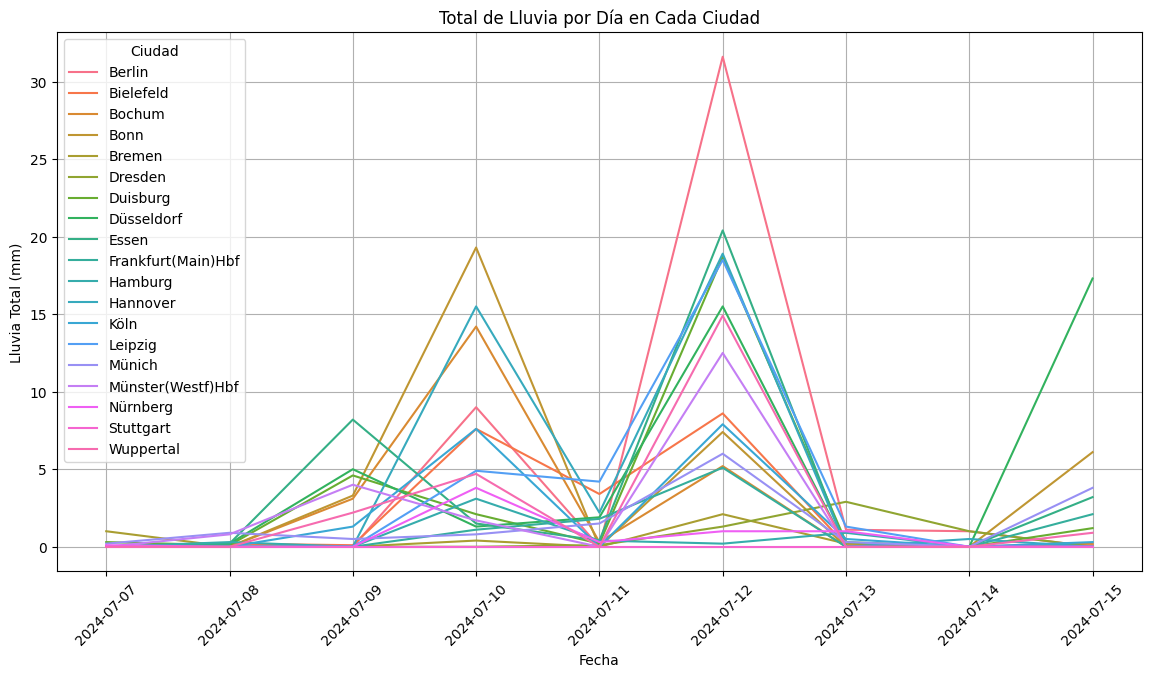

In [ ]:
rain_per_day = combined_data.groupby(['date', 'city'])['lluvia_mm'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=rain_per_day, x='date', y='lluvia_mm', hue='city')
plt.title('Total de Lluvia por Día en Cada Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Lluvia Total (mm)')
plt.xticks(rotation=45)
plt.legend(title='Ciudad')
plt.grid(True)
plt.show()

### Gráfica del viento promedio por día y ciudad

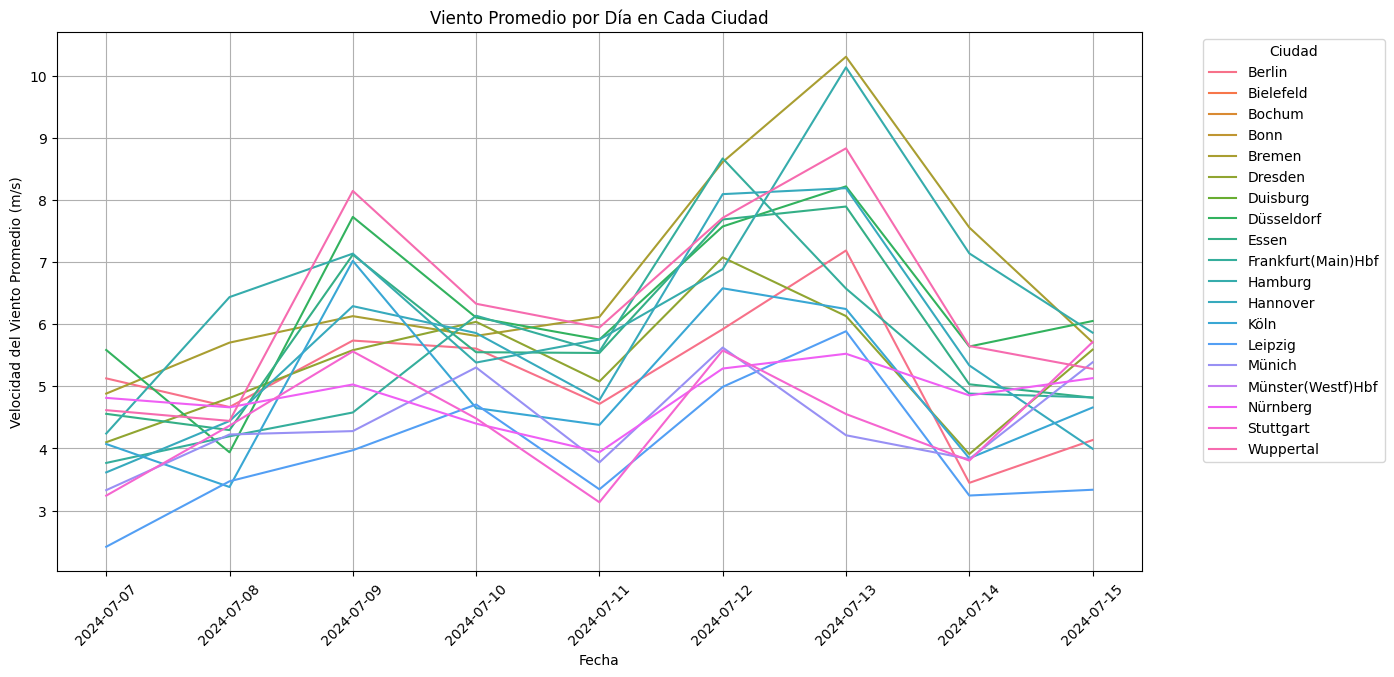

In [ ]:
wind_per_day = combined_data.groupby(['date', 'city'])['windspeed_mps'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=wind_per_day, x='date', y='windspeed_mps', hue='city')
plt.title('Viento Promedio por Día en Cada Ciudad')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento Promedio (m/s)')
plt.xticks(rotation=45)
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Gráfica de la variación de temperatura máxima y mínima por día y ciudad

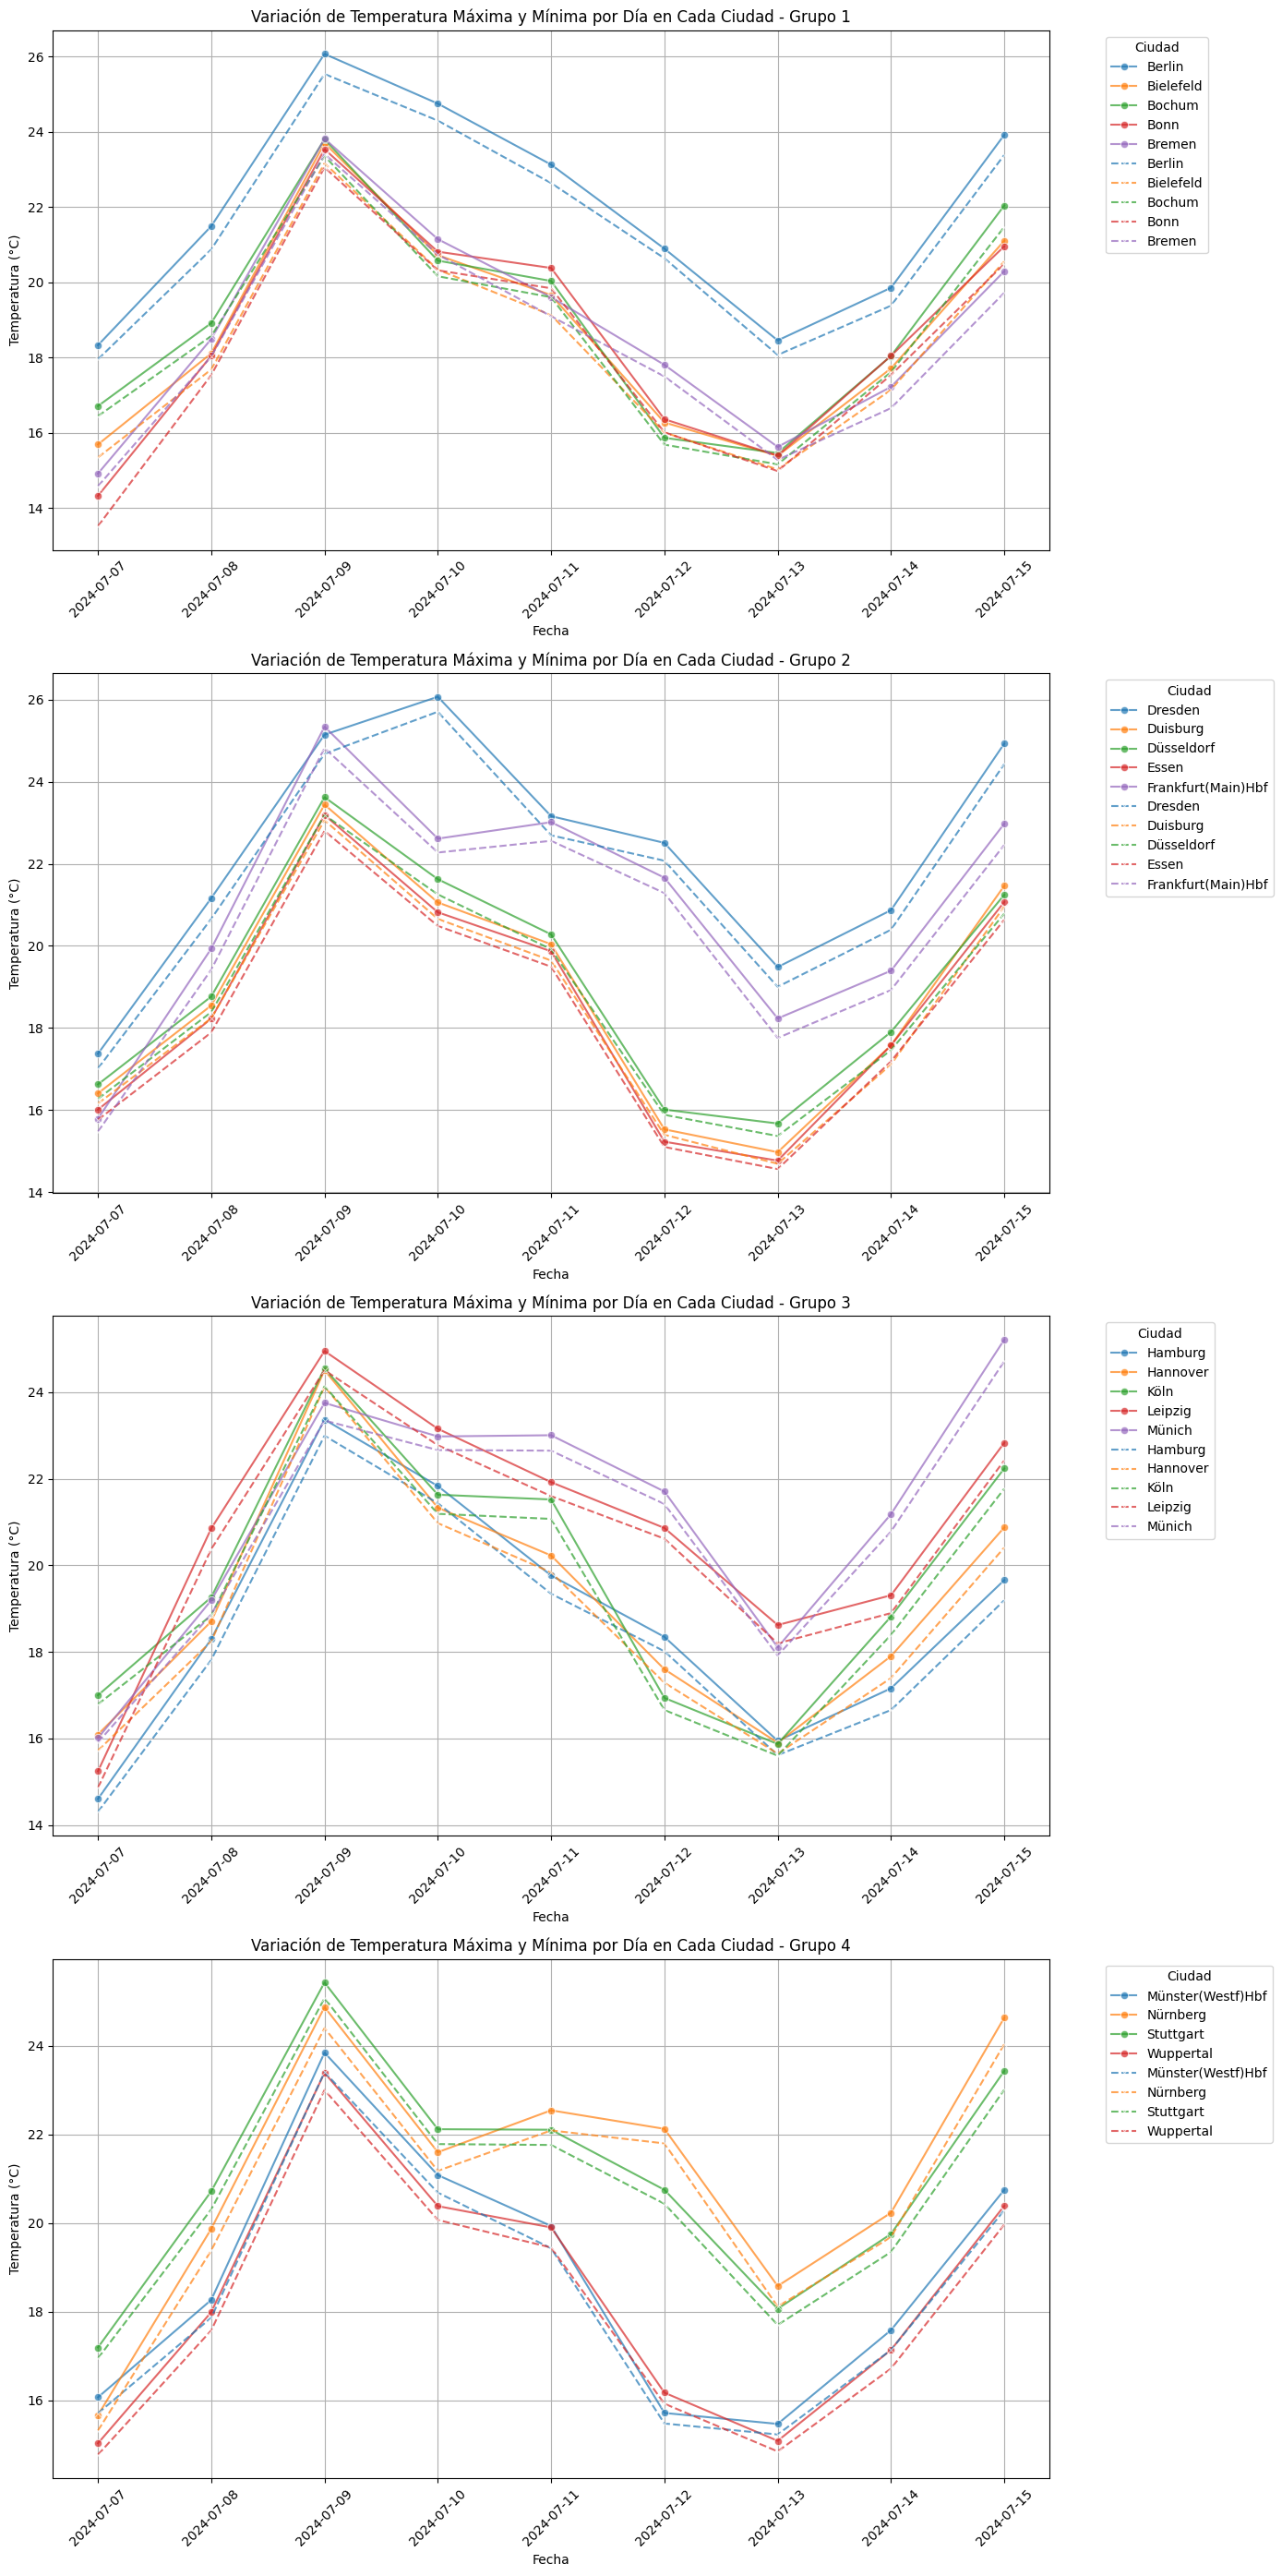

In [ ]:
combined_data['datetime_hour'] = pd.to_datetime(combined_data['datetime_hour'])

combined_data['date'] = combined_data['datetime_hour'].dt.date

temp_variation_per_day = combined_data.groupby(['date', 'city']).agg({
    'max_temp_2m_C': 'mean',
    'min_temp_2m_C': 'mean'
}).reset_index()

temp_variation_per_day.rename(columns={
    'max_temp_2m_C': 'max_temp_2m_C_mean',
    'min_temp_2m_C': 'min_temp_2m_C_mean'
}, inplace=True)

ciudades = temp_variation_per_day['city'].unique()
num_groups = 4
ciudades_divididas = np.array_split(ciudades, num_groups)

plt.figure(figsize=(14, 28))

for i, grupo in enumerate(ciudades_divididas):
    plt.subplot(num_groups, 1, i + 1)
    data_grupo = temp_variation_per_day[temp_variation_per_day['city'].isin(grupo)]
    sns.lineplot(data=data_grupo, x='date', y='max_temp_2m_C_mean', hue='city', marker='o', legend='full', alpha=0.7)
    sns.lineplot(data=data_grupo, x='date', y='min_temp_2m_C_mean', hue='city', marker='x', linestyle='--', legend='full', alpha=0.7)
    plt.title(f'Variación de Temperatura Máxima y Mínima por Día en Cada Ciudad - Grupo {i + 1}')
    plt.xlabel('Fecha')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(rotation=45)
    plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Gráfica de la cantidad total de trenes por hora y trenes con retraso por hora

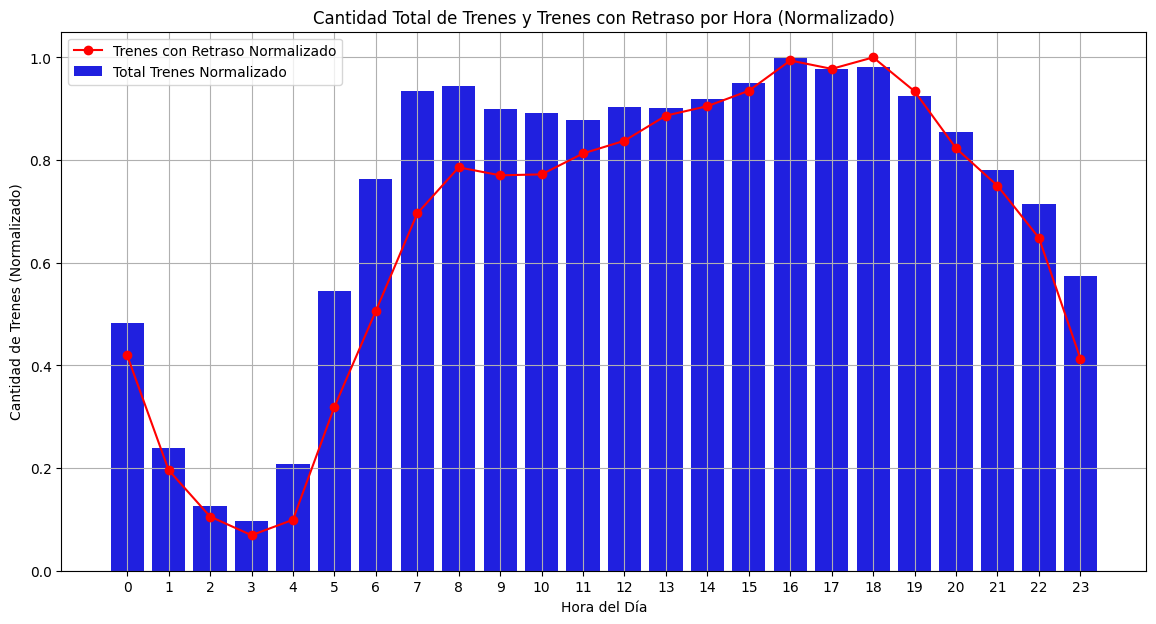

In [ ]:
combined_data['datetime_hour'] = pd.to_datetime(combined_data['datetime_hour'])
combined_data['hour_only'] = combined_data['datetime_hour'].dt.hour

combined_data['date'] = pd.to_datetime(combined_data['date'])
filtered_data = combined_data[combined_data['date'] > '2024-07-07']

trains_per_hour = filtered_data.groupby('hour_only').agg(
    total_trenes=('total_trenes', 'sum'),
    total_retrasos=('count_retraso', 'sum')
).reset_index()

all_hours = pd.DataFrame({'hour_only': range(24)})
trains_per_hour = all_hours.merge(trains_per_hour, on='hour_only', how='left').fillna(0)

trains_per_hour['total_trenes_normalized'] = trains_per_hour['total_trenes'] / trains_per_hour['total_trenes'].max()
trains_per_hour['total_retrasos_normalized'] = trains_per_hour['total_retrasos'] / trains_per_hour['total_retrasos'].max()

plt.figure(figsize=(14, 7))
sns.barplot(data=trains_per_hour, x='hour_only', y='total_trenes_normalized', color='blue', label='Total Trenes Normalizado')
plt.plot(trains_per_hour['hour_only'], trains_per_hour['total_retrasos_normalized'], color='red', marker='o', label='Trenes con Retraso Normalizado')
plt.title('Cantidad Total de Trenes y Trenes con Retraso por Hora (Normalizado)')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Trenes (Normalizado)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


### Gráfica de la cantidad total de trenes por hora y cancelaciones por hora

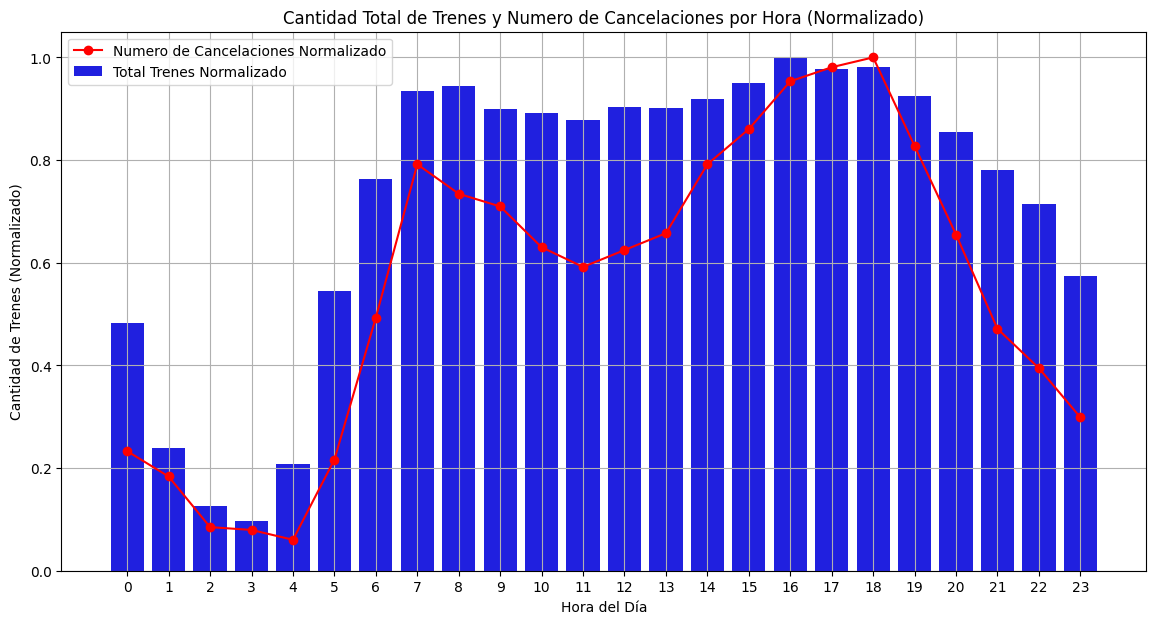

In [ ]:
combined_data['datetime_hour'] = pd.to_datetime(combined_data['datetime_hour'])
combined_data['hour_only'] = combined_data['datetime_hour'].dt.hour

combined_data['date'] = pd.to_datetime(combined_data['date'])
filtered_data = combined_data[combined_data['date'] > '2024-07-07']

trains_per_hour = filtered_data.groupby('hour_only').agg(
    total_trenes=('total_trenes', 'sum'),
    total_cancelaciones=('count_cancelled', 'sum')
).reset_index()

all_hours = pd.DataFrame({'hour_only': range(24)})
trains_per_hour = all_hours.merge(trains_per_hour, on='hour_only', how='left').fillna(0)

# Normalizar los datos
trains_per_hour['total_trenes_normalized'] = trains_per_hour['total_trenes'] / trains_per_hour['total_trenes'].max()
trains_per_hour['total_cancelaciones_normalized'] = trains_per_hour['total_cancelaciones'] / trains_per_hour['total_cancelaciones'].max()

plt.figure(figsize=(14, 7))
sns.barplot(data=trains_per_hour, x='hour_only', y='total_trenes_normalized', color='blue', label='Total Trenes Normalizado')
plt.plot(trains_per_hour['hour_only'], trains_per_hour['total_cancelaciones_normalized'], color='red', marker='o', label='Numero de Cancelaciones Normalizado')
plt.title('Cantidad Total de Trenes y Numero de Cancelaciones por Hora (Normalizado)')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Trenes (Normalizado)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


### Cantidad de Trenes por dia

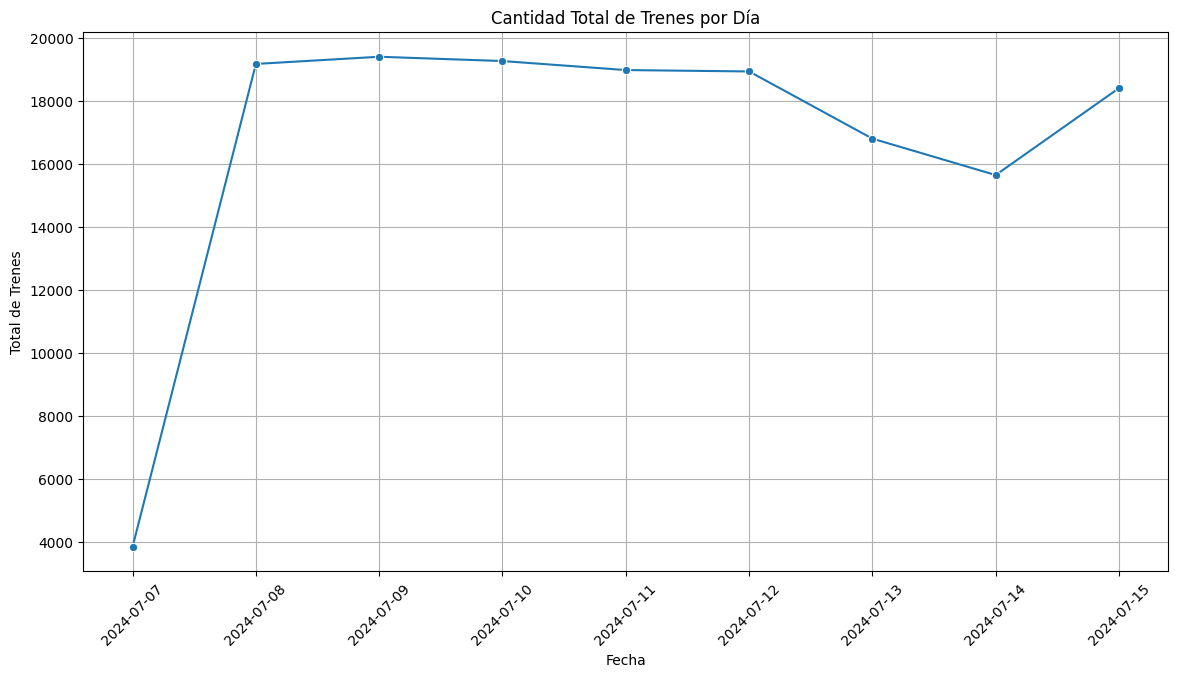

In [ ]:
total_Trenes_por_dia = combined_data.groupby('date')['total_trenes'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=total_Trenes_por_dia, x='date', y='total_trenes', marker='o', linestyle='-')
plt.title('Cantidad Total de Trenes por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Trenes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Cantidad total de retrasos por día

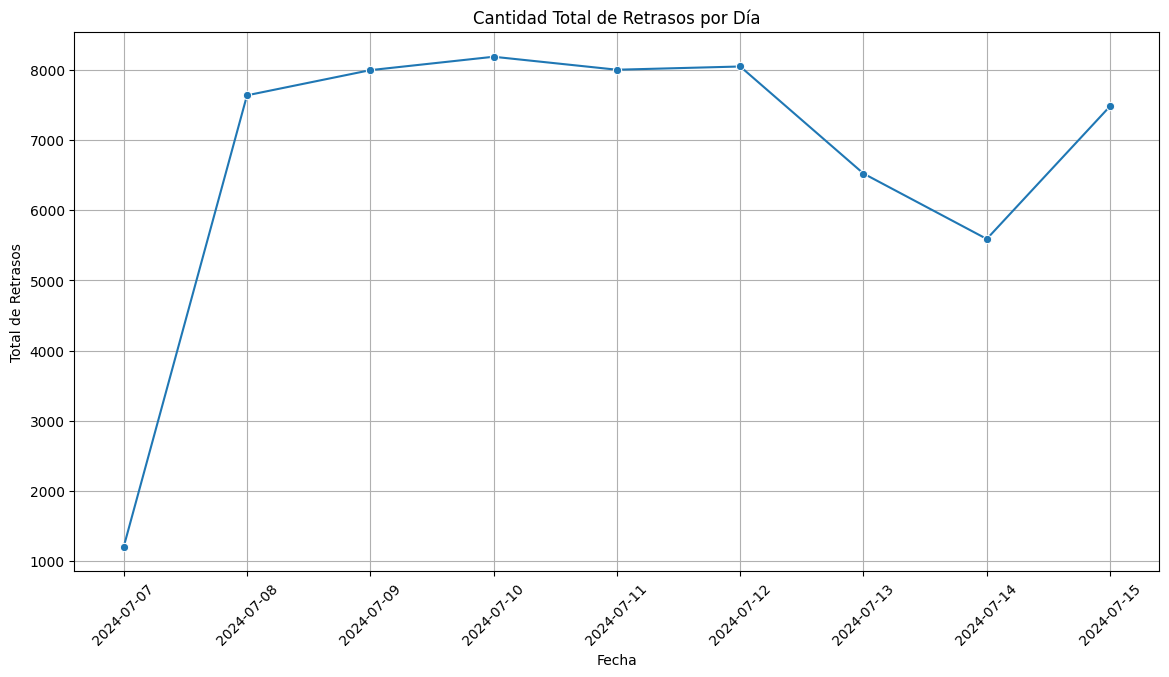

In [ ]:
total_retrasos_por_dia = combined_data.groupby('date')['count_retraso'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=total_retrasos_por_dia, x='date', y='count_retraso', marker='o', linestyle='-')
plt.title('Cantidad Total de Retrasos por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Retrasos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Total de cancelaciones por día

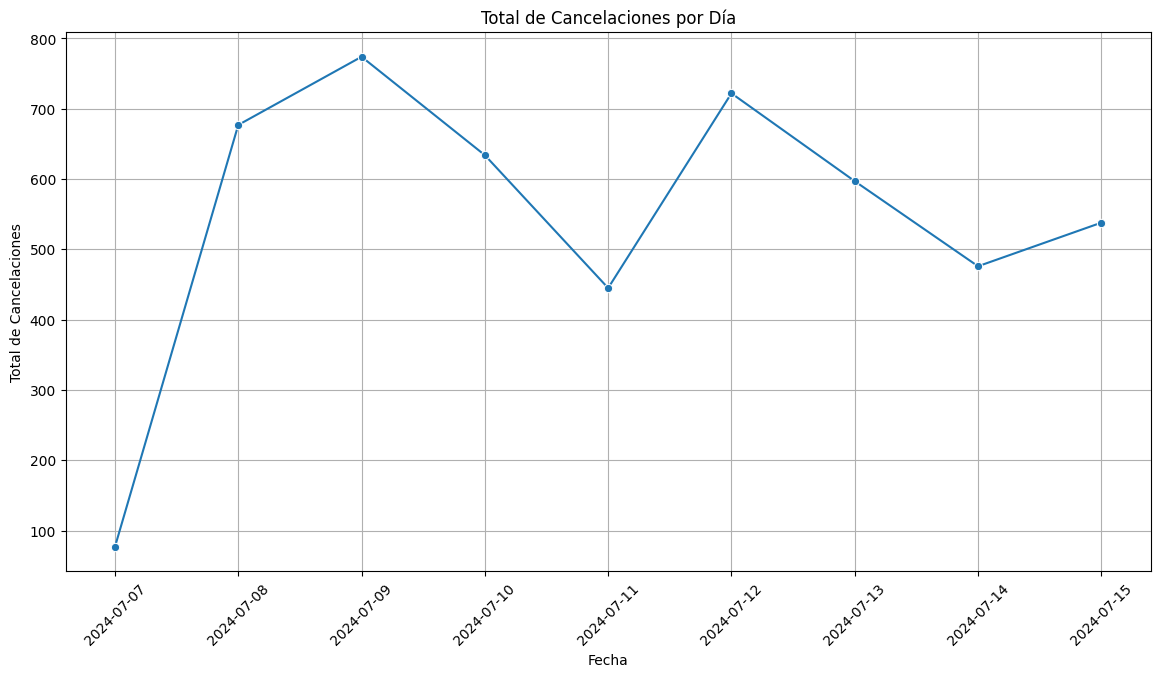

In [ ]:
total_cancelaciones_por_dia = combined_data.groupby('date')['count_cancelled'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=total_cancelaciones_por_dia, x='date', y='count_cancelled', marker='o', linestyle='-')
plt.title('Total de Cancelaciones por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Cancelaciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Analisis de Matriz de Correlacion Intradiario

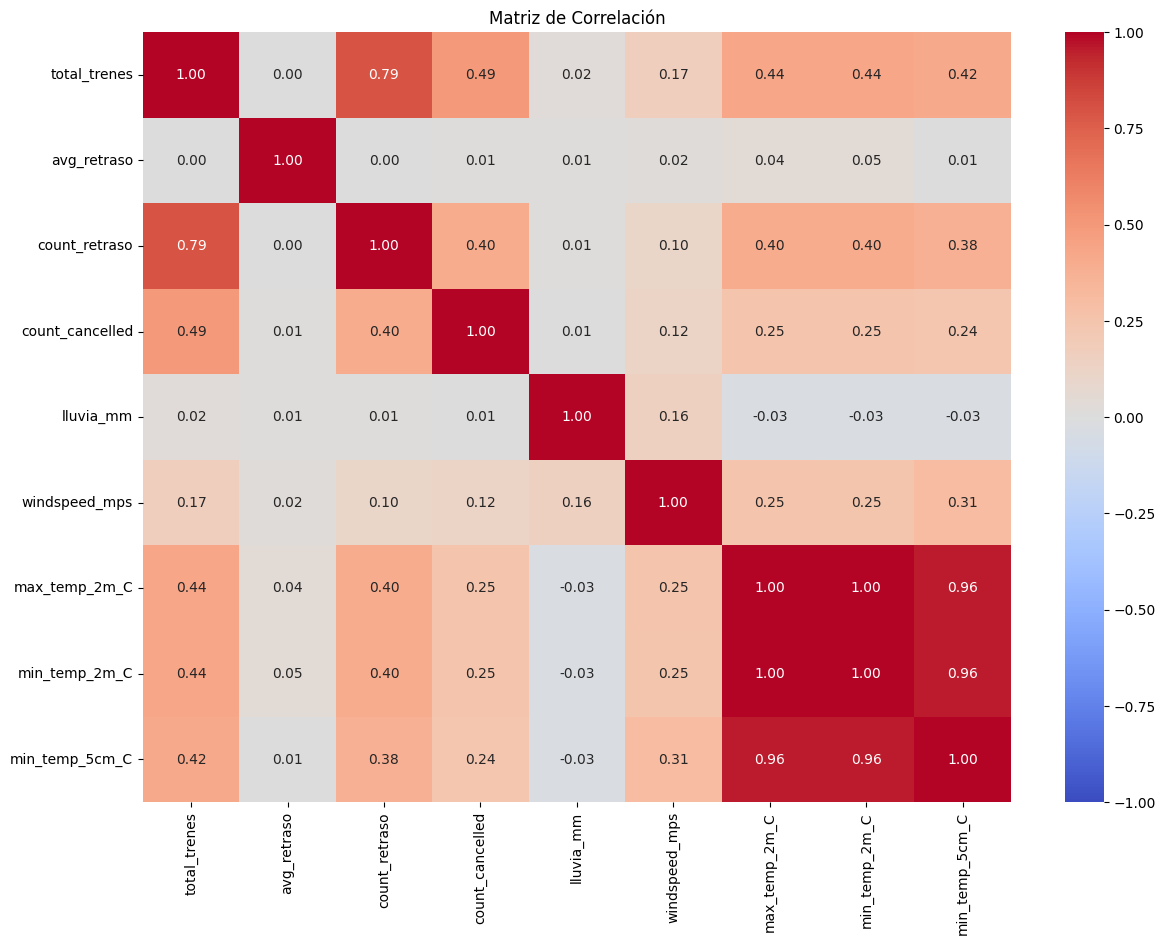

In [ ]:
numeric_columns = combined_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Matriz de Correlación')

plt.show()

### Analisis de Matriz de Correlacion Intradiario Ajustada

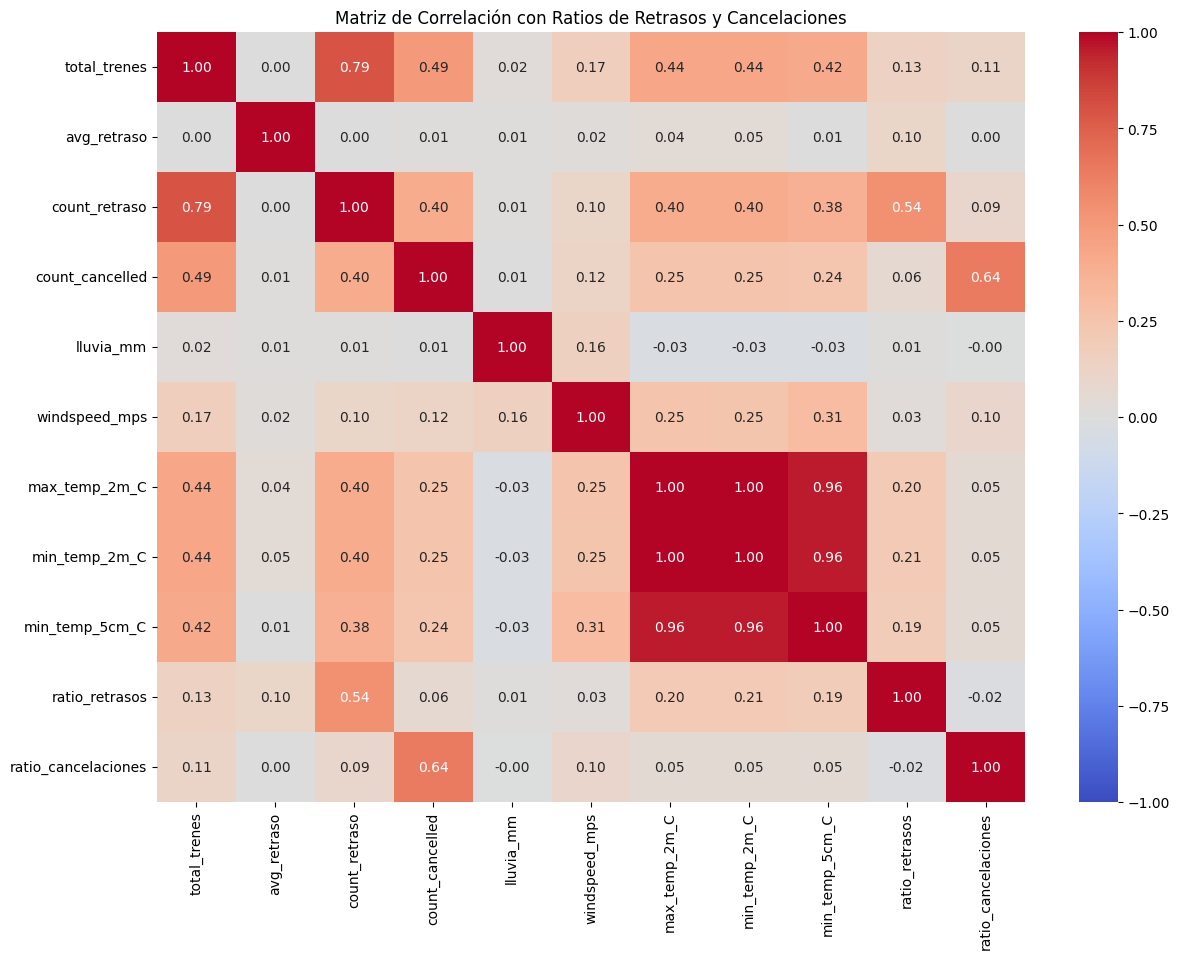

In [ ]:
combined_data['ratio_retrasos'] = combined_data['count_retraso'] / combined_data['total_trenes']
combined_data['ratio_cancelaciones'] = combined_data['count_cancelled'] / combined_data['total_trenes']

numeric_columns = combined_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Matriz de Correlación con Ratios de Retrasos y Cancelaciones')

plt.show()

### Matriz de Correlacion Diaria por Ciudad Ajustada

In [ ]:
daily_city_data = combined_data.groupby(['city', 'date']).agg(
    total_trenes=('total_trenes', 'sum'),
    lluvia_total=('lluvia_mm', 'sum'),
    total_retrasos=('count_retraso', 'sum'),
    total_cancelaciones=('count_cancelled', 'sum'),
    windspeed_avg=('windspeed_mps', 'mean'),
    max_temp_avg=('max_temp_2m_C', 'mean'),
    min_temp_avg=('min_temp_2m_C', 'mean')
).reset_index()

daily_city_data['ratio_retrasos'] = daily_city_data['total_retrasos'] / daily_city_data['total_trenes']
daily_city_data['ratio_cancelaciones'] = daily_city_data['total_cancelaciones'] / daily_city_data['total_trenes']

In [ ]:
print(daily_city_data.head())

     city       date  total_trenes  lluvia_total  total_retrasos  \
0  Berlin 2024-07-07           331           0.0              63   
1  Berlin 2024-07-08          1669           0.0             452   
2  Berlin 2024-07-09          1725           0.0             493   
3  Berlin 2024-07-10          1752           9.0             524   
4  Berlin 2024-07-11          1695           0.0             466   

   total_cancelaciones  windspeed_avg  max_temp_avg  min_temp_avg  \
0                    9       5.128571     18.330952     17.957143   
1                   64       4.666667     21.495833     20.877083   
2                  123       5.737500     26.074306     25.540972   
3                   96       5.608333     24.754167     24.302083   
4                   42       4.716667     23.131944     22.640972   

   ratio_retrasos  ratio_cancelaciones  
0        0.190332              0.02719  
1        0.270821             0.038346  
2        0.285797             0.071304  
3        0.2

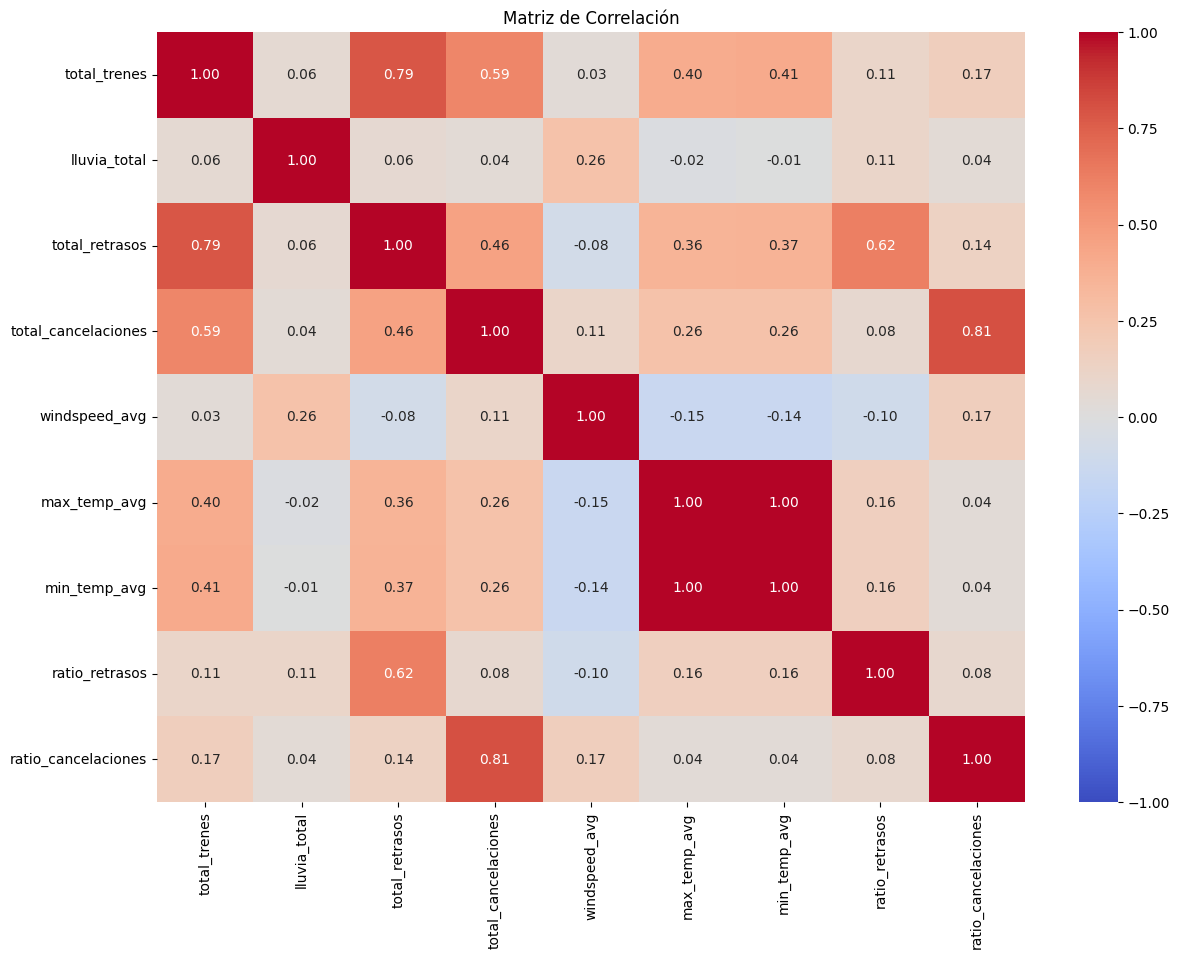

In [ ]:
numeric_columns = daily_city_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

# Modelo

## Evaluamos la significancia de cada variable

In [ ]:
import statsmodels.api as sm

X = daily_city_data[['lluvia_total', 'windspeed_avg', 'max_temp_avg']]

X = X.apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan).dropna()

X = sm.add_constant(X)

y_retrasos = daily_city_data.loc[X.index, 'ratio_retrasos'].apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan).dropna()

X = X.loc[y_retrasos.index]

model_retrasos = sm.OLS(y_retrasos, X).fit()

print(model_retrasos.summary())

                            OLS Regression Results                            
Dep. Variable:         ratio_retrasos   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.892
Date:                Tue, 16 Jul 2024   Prob (F-statistic):             0.0381
Time:                        16:37:51   Log-Likelihood:                 71.924
No. Observations:                 126   AIC:                            -135.8
Df Residuals:                     122   BIC:                            -124.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2087      0.104      2.015

In [ ]:
y_cancelaciones = daily_city_data.loc[X.index, 'ratio_cancelaciones'].apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan).dropna()

X = X.loc[y_cancelaciones.index]

model_cancelaciones = sm.OLS(y_cancelaciones, X).fit()

print(model_cancelaciones.summary())

                             OLS Regression Results                            
Dep. Variable:     ratio_cancelaciones   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                  0.029
Method:                  Least Squares   F-statistic:                     2.235
Date:                 Tue, 16 Jul 2024   Prob (F-statistic):             0.0875
Time:                         16:38:13   Log-Likelihood:                 289.45
No. Observations:                  126   AIC:                            -570.9
Df Residuals:                      122   BIC:                            -559.5
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0143      0.018 

### Crear modelo lineal para predecir ratio_retrasos y ratio_cancelaciones

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = daily_city_data[['windspeed_avg', 'max_temp_avg']]
X = X.apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan)

y_retrasos = daily_city_data['ratio_retrasos'].apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan)

complete_data = pd.concat([X, y_retrasos], axis=1).dropna()
X = complete_data[['windspeed_avg', 'max_temp_avg']]
y_retrasos = complete_data['ratio_retrasos']

X_train, X_test, y_retrasos_train, y_retrasos_test = train_test_split(X, y_retrasos, test_size=0.2, random_state=42)

model_retrasos = LinearRegression()
model_retrasos.fit(X_train, y_retrasos_train)

y_retrasos_pred = model_retrasos.predict(X_test)
print("MSE (ratio_retrasos):", mean_squared_error(y_retrasos_test, y_retrasos_pred))
print("R2 (ratio_retrasos):", r2_score(y_retrasos_test, y_retrasos_pred))

MSE (ratio_retrasos): 0.029341805050422796
R2 (ratio_retrasos): -0.06769865571147937


In [ ]:
y_cancelaciones = daily_city_data['ratio_cancelaciones'].apply(pd.to_numeric).replace([np.inf, -np.inf], np.nan)

complete_data = pd.concat([X, y_cancelaciones], axis=1).dropna()
X = complete_data[['windspeed_avg', 'max_temp_avg']]
y_cancelaciones = complete_data['ratio_cancelaciones']

X_train, X_test, y_cancelaciones_train, y_cancelaciones_test = train_test_split(X, y_cancelaciones, test_size=0.2, random_state=42)

model_cancelaciones = LinearRegression()
model_cancelaciones.fit(X_train, y_cancelaciones_train)

y_cancelaciones_pred = model_cancelaciones.predict(X_test)
print("MSE (ratio_cancelaciones):", mean_squared_error(y_cancelaciones_test, y_cancelaciones_pred))
print("R2 (ratio_cancelaciones):", r2_score(y_cancelaciones_test, y_cancelaciones_pred))

MSE (ratio_cancelaciones): 0.0003766534795866494
R2 (ratio_cancelaciones): -0.23795735078087432


## Graficamos el Modelo

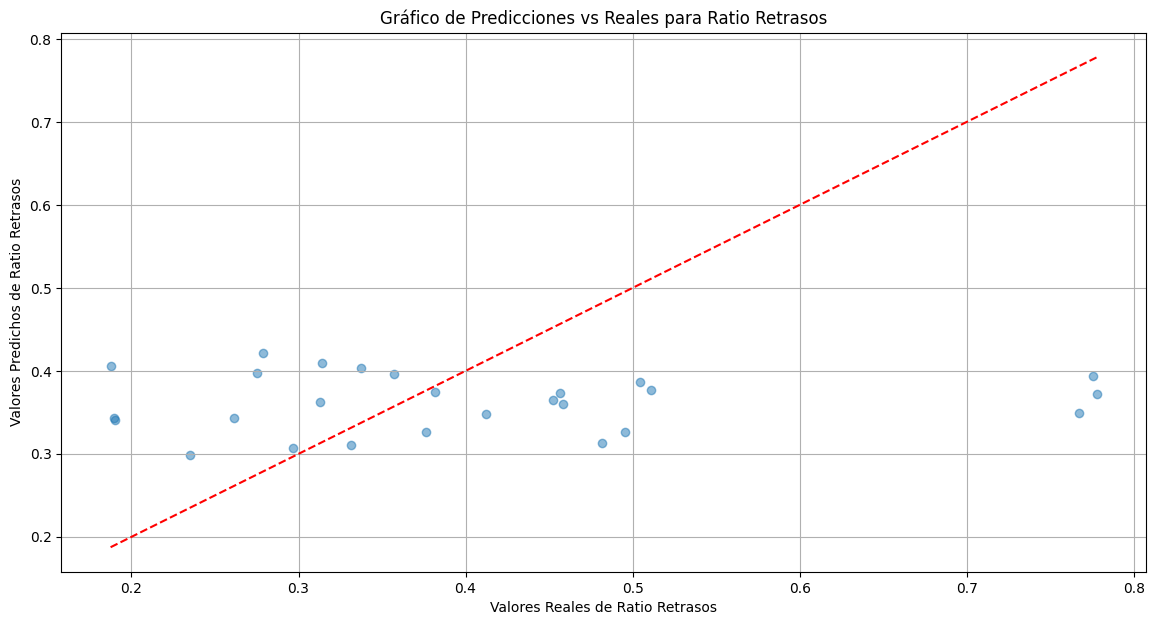

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(y_retrasos_test, y_retrasos_pred, alpha=0.5)
plt.plot([y_retrasos_test.min(), y_retrasos_test.max()], [y_retrasos_test.min(), y_retrasos_test.max()], 'r--')
plt.xlabel('Valores Reales de Ratio Retrasos')
plt.ylabel('Valores Predichos de Ratio Retrasos')
plt.title('Gráfico de Predicciones vs Reales para Ratio Retrasos')
plt.grid(True)
plt.show()

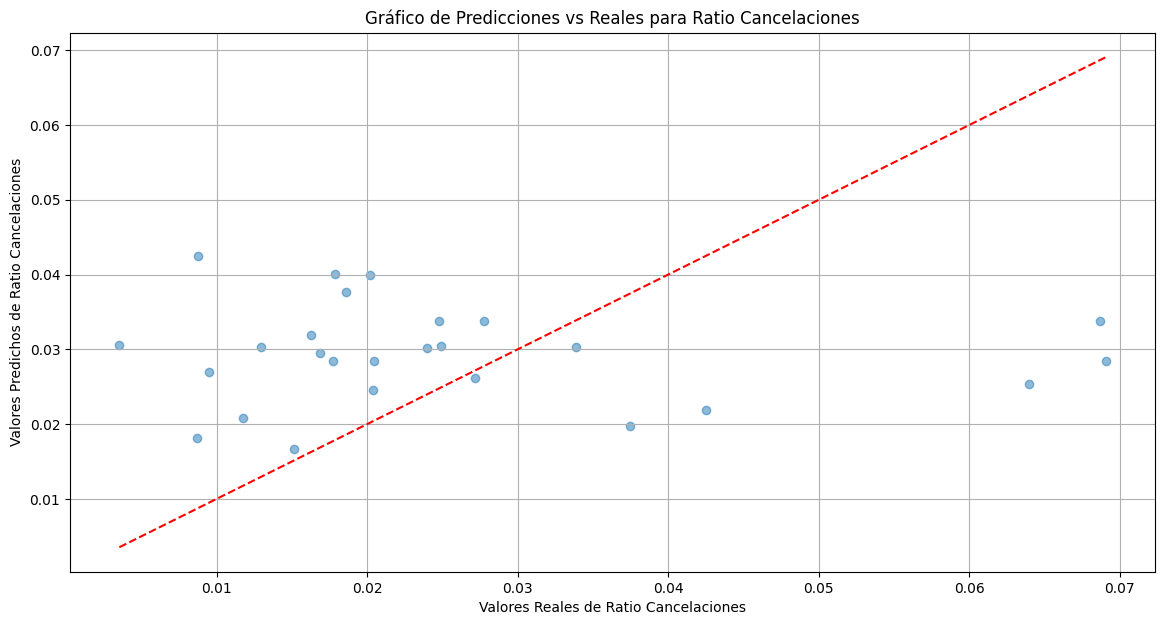

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(y_cancelaciones_test, y_cancelaciones_pred, alpha=0.5)
plt.plot([y_cancelaciones_test.min(), y_cancelaciones_test.max()], [y_cancelaciones_test.min(), y_cancelaciones_test.max()], 'r--')
plt.xlabel('Valores Reales de Ratio Cancelaciones')
plt.ylabel('Valores Predichos de Ratio Cancelaciones')
plt.title('Gráfico de Predicciones vs Reales para Ratio Cancelaciones')
plt.grid(True)
plt.show()